In [57]:
from keras.applications.xception import Xception
from keras.preprocessing.image import load_img,img_to_array
from keras.applications.xception import preprocess_input
from keras.models import Model,load_model
def image_feature(filename):
    model=Xception(include_top=True,weights='imagenet')
    lastlayer=model.layers[-2].output
    model=Model(inputs=model.input,outputs=lastlayer)
    image=load_img(filename,target_size=(299,299))
    image=img_to_array(image)
    image=image.reshape(1,299,299,3)
    image=preprocess_input(image)
    feature=model.predict(image)
    return feature

In [47]:
def load_dataset(dataset):
  data_info=[]
  data=open(dataset, 'r')
  text=data.read()
  data.close()
  for i in text.split('\n'):
    id=i.split('.')[0]
    data_info.append(id)
  return(data_info)

In [48]:
from pickle import load
from keras.preprocessing.sequence import pad_sequences

In [49]:
def word_reverse_mapping(word_id,tokenizer):
    for word,num in tokenizer.word_index.items():
        if num==word_id:
            return word
    return None

In [50]:
def caption_generate(cnn_model,tokenizer,image,maxlen):
    caption='startofseq'
    for i in range(maxlen):
        sequence=tokenizer.texts_to_sequences([caption])[0]
        sequence=pad_sequences([sequence],maxlen=maxlen)
        word_id=argmax(cnn_model.predict([image,sequence],verbose=0))
        word=word_reverse_mapping(word_id,tokenizer)
        if word is None:
            break
        caption += ' ' + word
        if word=='endofseq':
            break
    return caption

In [52]:
tokenizer=load(open('C:/Users/mahid/M.Tech Project/Untitled Folder/tokenizer.pkl','rb'))
maxlen=34
model=load_model('C:/Users/mahid/M.Tech Project/Untitled Folder/Xception/caption_model_10.h5')
test_dataset = load_dataset('C:/Users/mahid/M.Tech Project/Data Set/Flickr8k_text/Flickr_8k.testImages.txt')
print(len(test_dataset))

2001


In [53]:
import matplotlib as pyplot
import numpy as np
from numpy import argmax

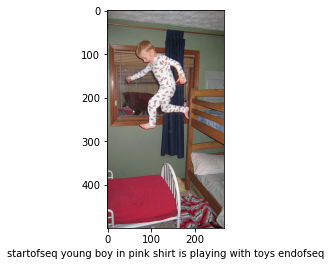

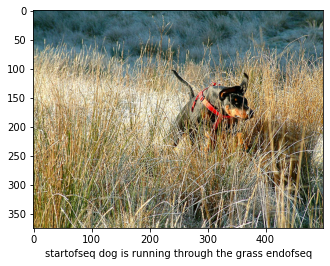

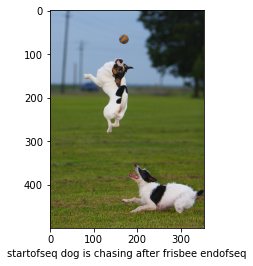

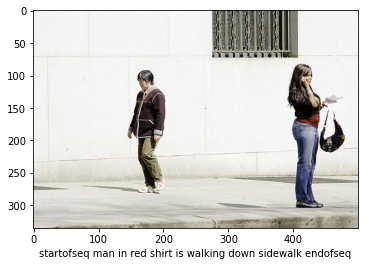

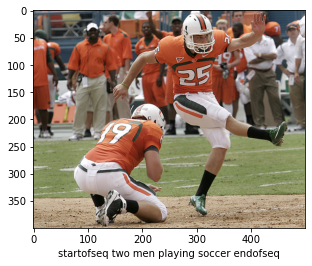

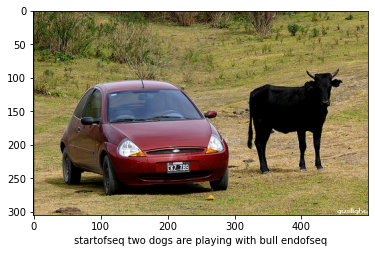

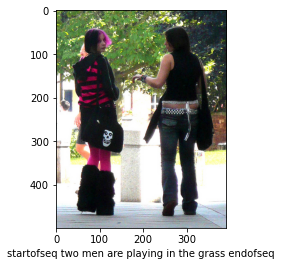

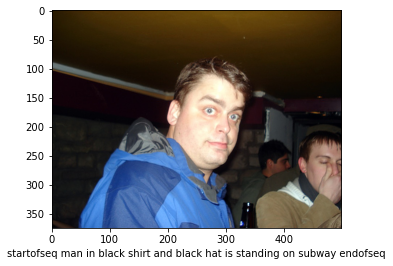

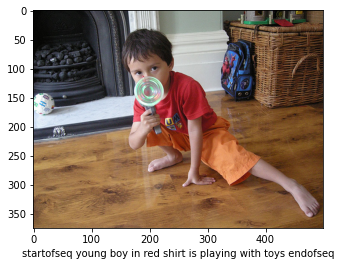

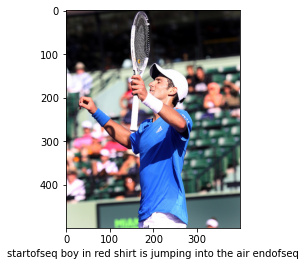

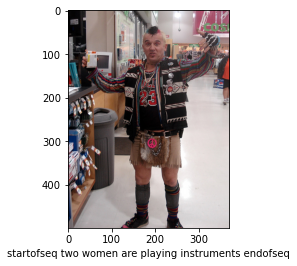

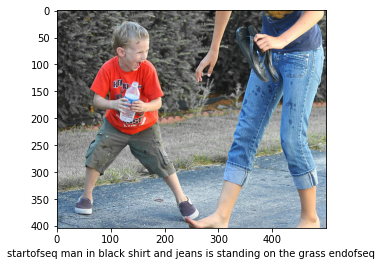

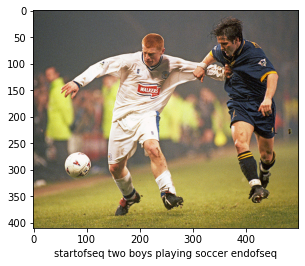

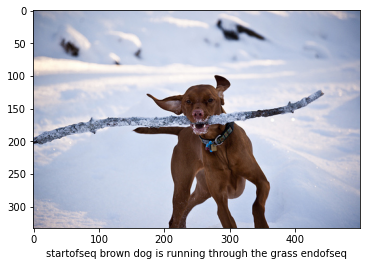

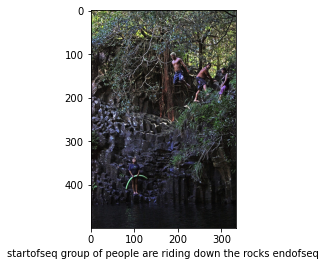

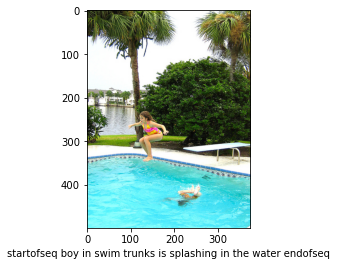

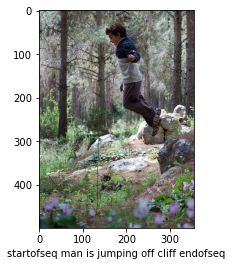

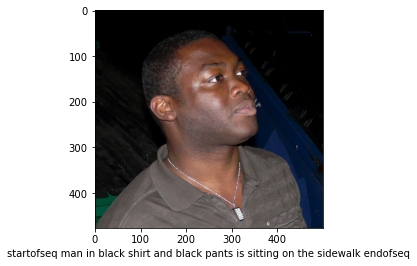

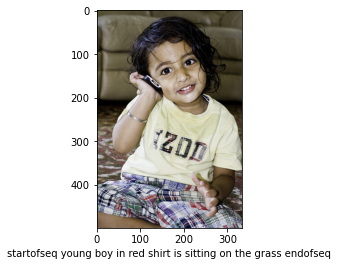

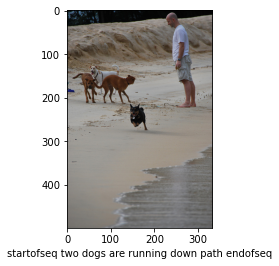

In [59]:
for i in range(20):
    no=np.random.randint(0,2000,(1,1))[0,0]
    image=image_feature('C:/Users/mahid/M.Tech Project/Data Set/Images/'+str(test_dataset[no])+'.jpg')
    caption=caption_generate(model,tokenizer,image,maxlen)
    test_image=cv2.imread('C:/Users/mahid/M.Tech Project/Data Set/Images/'+str(test_dataset[no])+'.jpg')
    test_image=cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(test_image)
    plt.xlabel(caption)